[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cca-cce/osm-cca/blob/main/jnb/simm71/cv2_lab.ipynb)

# Research question

**Introduction:**  
How can advanced computer vision techniques, such as image classification, emotion recognition, and object detection, be applied to differentiate between authentic sustainability communication and inauthentic greenwashing in corporate imagery? To what extent do these visual strategies differ between organizations with inherently unsustainable operations (e.g., Preem) and those focused on renewable energy (e.g., Vattenfall)? By examining these distinctions, we aim to uncover patterns that reveal the sincerity of sustainability messaging and identify the hallmarks of greenwashing.

**Research Question:**  
How do image classification, emotion recognition, and object detection differentiate authentic sustainability communication from greenwashing, and what visual elements are more prevalent in the imagery of organizations with varying levels of environmental responsibility?

**Hypotheses:**  
1. Images from companies with inherently unsustainable operations will display higher frequencies of stereotypical sustainability symbols (e.g., lush greenery, wildlife) as identified through object detection, compared to companies focused on renewable energy.
2. Emotion recognition will reveal a higher prevalence of imagery evoking positive emotions (e.g., happiness, serenity) in greenwashing campaigns to manipulate perceptions of sustainability.
3. Image classification models will show significant differences in the thematic categories of images used, with greenwashing campaigns leaning heavily on naturalistic themes compared to authentic sustainability communication.

**Proposed Investigation:**  
This study will leverage computer vision methods to systematically analyze the visual strategies employed by companies like Preem and Vattenfall in their sustainability communication. Specifically, we will:

- **Image Classification**: Utilize pre-trained or fine-tuned classification models to categorize images into thematic groups (e.g., nature, industry, renewable energy). The relative frequencies of these themes can be compared to assess the focus of each company's communication strategy.
- **Emotion Recognition**: Apply models capable of detecting emotional cues in images, such as smiling faces or tranquil landscapes, to determine whether certain emotions are over-represented in greenwashing campaigns.
- **Object Detection**: Use object detection models to identify the presence of key visual elements such as solar panels, wind turbines, forests, or wildlife. This analysis can highlight whether companies disproportionately emphasize certain objects to project an image of sustainability.

**Measuring Authenticity Through Computer Vision:**
1. **Image Classification**: Models like Vision Transformers (ViT) or ResNet can categorize images into predefined classes (e.g., industrial settings, natural landscapes). Companies employing greenwashing are expected to overemphasize naturalistic imagery, creating a contrast with the actual focus of their operations.
2. **Emotion Recognition**: Tools such as AffectNet or Microsoft Azure’s Face API can detect emotional tones in images. Greenwashing campaigns are hypothesized to leverage positive emotional imagery to evoke trust and environmental friendliness.
3. **Object Detection**: Models like YOLOv5 or Faster R-CNN can be used to identify specific objects in the images. For example, an overrepresentation of trees, flowers, or animals in Preem’s visuals compared to Vattenfall’s may signal greenwashing tactics.

**Hypothesis Testing and Validation:**
- **Quantitative Comparisons**: Analyze the proportion of naturalistic versus industrial themes across both companies’ image sets. Use statistical tests (e.g., chi-square, t-tests) to determine significant differences.
- **Emotion Analysis**: Compare the emotional tones prevalent in each company’s imagery to test whether greenwashing campaigns rely more heavily on eliciting positive emotions.
- **Visual Authenticity Scores**: Combine findings from classification, emotion recognition, and object detection into composite scores representing the likelihood of greenwashing. These scores can be validated against expert assessments of image authenticity.

**Expected Contributions:**  
By applying computer vision techniques to differentiate between authentic sustainability communication and greenwashing, this study aims to:
- Develop a systematic approach to evaluate the sincerity of visual sustainability messaging.
- Provide insights into the visual hallmarks of greenwashing campaigns.
- Offer a replicable framework for analyzing corporate sustainability communication across industries.

The results of this investigation can enhance our understanding of how visual content is used to shape public perceptions of sustainability and support the development of tools to hold organizations accountable for misleading practices.

# Download visual content data

In [1]:
# https://drive.google.com/file/d/1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W/view?usp=sharing
!rm -rf *.zip cv-* 2>/dev/null
!gdown https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
!unzip -q *.zip 2>/dev/null

Downloading...
From (original): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
From (redirected): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W&confirm=t&uuid=5784cfcf-a98b-4412-a092-e5297c7aaf80
To: /content/drive-download-20250106T125430Z-001.zip
100% 114M/114M [00:02<00:00, 53.0MB/s]


**Download File from Google Drive Using gdown**: The `gdown` command-line tool is used to download files directly from Google Drive using a file ID. The Google Drive URL is converted into a downloadable format (`https://drive.google.com/uc?id=<file_id>`), and the file is downloaded into the current working directory. Example: `!gdown https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W` downloads the file associated with the specified ID.

**Remove Unnecessary Files and Prepare Workspace**: The `rm` command is used to clean the workspace by removing specific files or folders (e.g., `.zip` files, directories starting with `cv-*`) if they exist. This ensures a clean slate before processing new files. Example: `!rm -rf *.zip cv-* 2>/dev/null` removes all `.zip` files and directories prefixed with `cv-*`, suppressing any errors if the files don't exist.

**Extract Downloaded ZIP File**: The `unzip` command extracts the contents of the downloaded `.zip` file into the current directory. The `-q` flag suppresses output messages for a cleaner execution, and `2>/dev/null` prevents error messages if no `.zip` files are found. Example: `!unzip -q *.zip 2>/dev/null` extracts the first `.zip` file in the directory silently.

# Read and display sample image

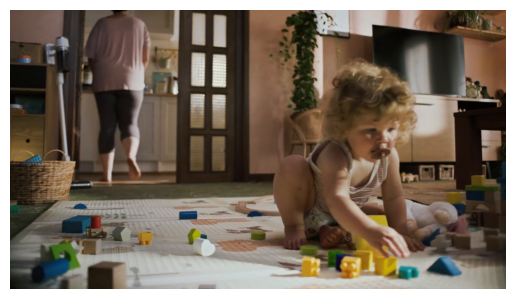

In [2]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0002.png"
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


**Import Necessary Libraries**: The code begins by importing essential libraries for image processing and visualization:
- `cv2` for image loading and processing.
- `matplotlib.pyplot` for visualizing the images.
- `seaborn` for enhancing the aesthetics of plots.  

Example: `import cv2` imports OpenCV for image operations, while `sns.set()` applies Seaborn's styles for improved visuals.

**Read the Image Using OpenCV**: The `cv2.imread` function loads an image from the specified file path. The image is stored as a multi-dimensional array in BGR (Blue-Green-Red) color format. Example: `image = cv2.imread(image_path)` reads the image located at the path stored in `image_path`.

**Convert BGR to RGB**: OpenCV loads images in BGR color format, but `matplotlib` displays images in RGB format. The `cv2.cvtColor` function converts the color scheme to RGB for correct visualization. Example: `image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)` performs this conversion.

**Enhance Plot Aesthetics Using Seaborn**: The `sns.set()` function applies Seaborn's style settings to the plot, improving its appearance. This ensures that the visualizations have a modern and clean look.

**Display the Image Using Matplotlib**: The `plt.imshow` function displays the image array in its RGB format, while `plt.axis('off')` hides the axes for a cleaner view. Finally, `plt.show()` renders the image in the notebook or script.

# Extract manifest image features

### Extracting Manifest Content Features Through Computer Vision

Manifest content features in images can be extracted using computer vision techniques that analyze the readily available information in image pixels. These features are explicit, directly measurable characteristics that describe the visual content of an image. Here are some common approaches:

1. **Pixel Dimensions**: The resolution of an image (e.g., 1920x1080 pixels) provides basic structural information about its size and aspect ratio, which can be used to infer the scale or focus of the visual content.

2. **Edge Detection**: Algorithms like Canny or Sobel edge detection identify areas of significant contrast in an image, outlining shapes, boundaries, and structures. These edges help in recognizing objects and understanding spatial relationships within the image.

3. **Color Histograms**: A color histogram captures the distribution of pixel intensities across color channels (e.g., RGB). It provides a summary of the dominant colors, allowing for the analysis of color themes, moods, or branding elements in an image.

4. **SIFT Key Points**: Scale-Invariant Feature Transform (SIFT) detects distinctive points in an image that are invariant to scale and rotation. These key points represent unique visual features, such as corners or textures, which can be used for tasks like image matching or object recognition.

By leveraging these techniques, computer vision extracts meaningful and quantifiable features from image pixels, enabling the analysis of visual content in a structured and scalable manner. This process is essential for tasks such as image classification, content analysis, and automated image annotation.

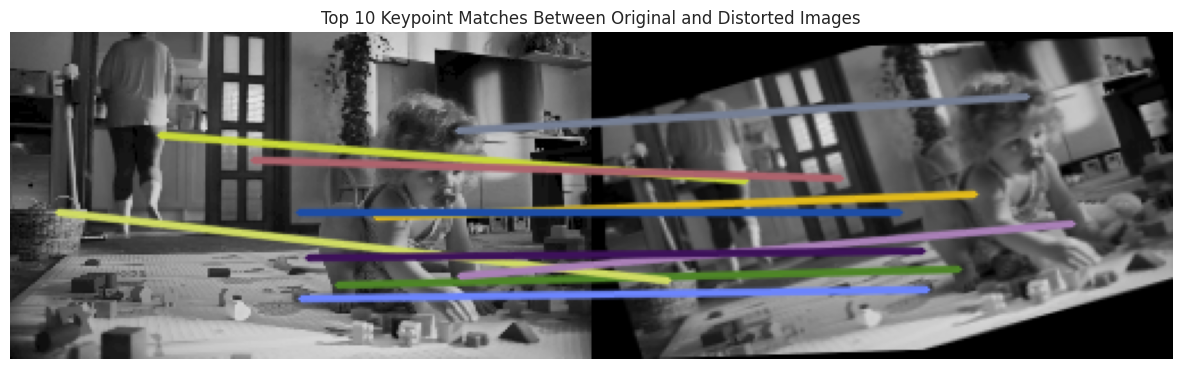

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load and downsample the original image to width 256 pixels
original_image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0002.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    raise FileNotFoundError(f"Image not found at {original_image_path}")

# Downsample the image to 256 pixels width while maintaining the aspect ratio
height, width = original_image.shape
new_width = 256
new_height = int(height * (new_width / width))
original_image = cv2.resize(original_image, (new_width, new_height))

# Create a less distorted version of the image (rotate, skew, downsample slightly)
def distort_image(image):
    rows, cols = image.shape

    # Rotation (smaller angle)
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle=15, scale=1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Skew (less dramatic affine transformation)
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[55, 55], [205, 50], [60, 195]])
    affine_matrix = cv2.getAffineTransform(pts1, pts2)
    skewed_image = cv2.warpAffine(rotated_image, affine_matrix, (cols, rows))

    return skewed_image

distorted_image = distort_image(original_image)

# Detect SIFT keypoints and descriptors
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(original_image, None)
keypoints2, descriptors2 = sift.detectAndCompute(distorted_image, None)

# Match keypoints using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)  # Sort by distance (quality)

# Select the top 10 matches
top_matches = matches[:10]

# Create a combined image to visualize matches
output_height = max(original_image.shape[0], distorted_image.shape[0])
output_width = original_image.shape[1] + distorted_image.shape[1]
matched_image = np.zeros((output_height, output_width), dtype=np.uint8)

# Place the original and distorted images side by side
matched_image[:original_image.shape[0], :original_image.shape[1]] = original_image
matched_image[:distorted_image.shape[0], original_image.shape[1]:] = distorted_image

# Draw lines between the top key points
color_image = cv2.cvtColor(matched_image, cv2.COLOR_GRAY2BGR)
for match in top_matches:
    pt1 = tuple(map(int, keypoints1[match.queryIdx].pt))
    pt2 = tuple(map(int, keypoints2[match.trainIdx].pt))
    pt2 = (pt2[0] + original_image.shape[1], pt2[1])  # Adjust pt2 x-coordinate for side-by-side display

    # Generate a random color for each match
    color = [random.randint(0, 255) for _ in range(3)]

    # Draw smooth lines
    cv2.line(color_image, pt1, pt2, color, thickness=2, lineType=cv2.LINE_AA)

# Display the result
plt.figure(figsize=(15, 8))
plt.imshow(color_image[..., ::-1])  # Convert BGR to RGB for displaying in matplotlib
plt.axis("off")
plt.title("Top 10 Keypoint Matches Between Original and Distorted Images")
plt.show()


**Load and Downsample the Image**: The original grayscale image is loaded using OpenCV from a specified file path. If the image is successfully found, it is downsampled to a width of 256 pixels while maintaining its aspect ratio to ensure proper visualization and processing.

**Distort the Image**: A distortion function is applied to create a slightly rotated and skewed version of the image. This involves applying a small rotation transformation and a subtle affine transformation to simulate realistic variations while preserving key visual features.

**Detect Keypoints and Descriptors Using SIFT**: The SIFT (Scale-Invariant Feature Transform) algorithm is used to detect distinctive keypoints and extract descriptors for both the original and distorted images. These features capture important patterns and structures in the images.

**Match Keypoints Between Images**: The BFMatcher (Brute Force Matcher) algorithm compares the descriptors from the two images and identifies matching keypoints. The matches are sorted based on quality, and the top 10 matches are selected for visualization.

**Visualize Matches**: The original and distorted images are displayed side by side, and lines are drawn between the matching keypoints. Each line is colored randomly to highlight the matches, and smooth line rendering ensures clarity in visualization.

**Display the Results**: The combined image, showing the original and distorted images along with the top 10 keypoint matches, is displayed using Matplotlib. The visualization illustrates the robustness of the SIFT algorithm in identifying consistent features despite distortions.

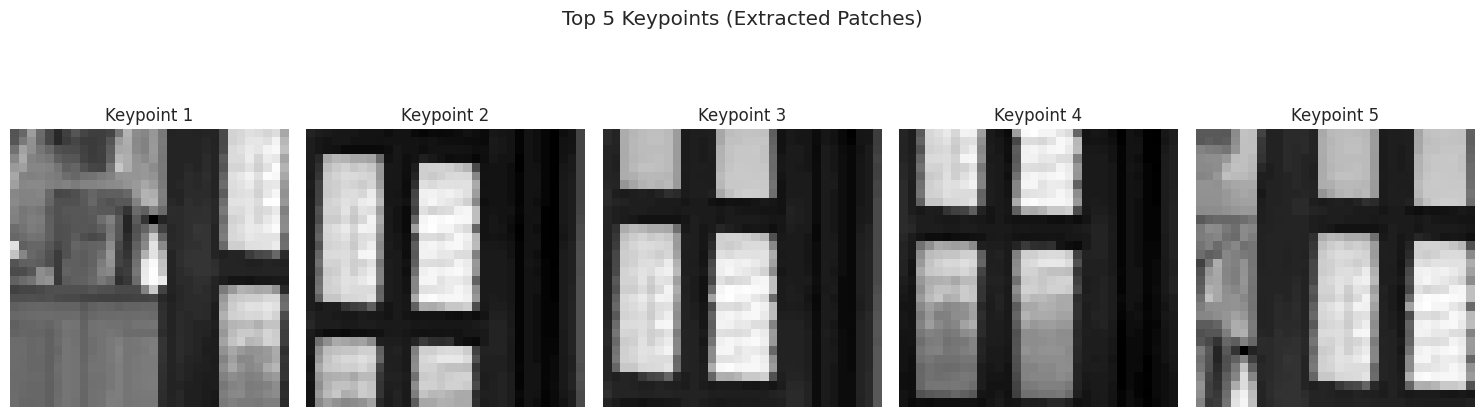

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to extract and plot individual keypoints
def extract_keypoint_patch(image, keypoint, patch_size=32):
    """
    Extract a patch around a keypoint.
    :param image: Input image (grayscale).
    :param keypoint: Keypoint object.
    :param patch_size: Size of the square patch (default: 32x32).
    :return: Cropped patch around the keypoint.
    """
    x, y = map(int, keypoint.pt)
    half_size = patch_size // 2
    return image[max(y - half_size, 0):y + half_size, max(x - half_size, 0):x + half_size]

# Load the original image
original_image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0002.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    raise FileNotFoundError(f"Image not found at {original_image_path}")

# Downsample the image to 256 pixels width while maintaining the aspect ratio
height, width = original_image.shape
new_width = 256
new_height = int(height * (new_width / width))
original_image = cv2.resize(original_image, (new_width, new_height))

# Detect SIFT keypoints and descriptors
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(original_image, None)

# Select the top 5 keypoints based on their response (strength)
keypoints = sorted(keypoints, key=lambda kp: kp.response, reverse=True)[:5]

# Extract patches around the top 5 keypoints
patches = [extract_keypoint_patch(original_image, kp) for kp in keypoints]

# Plot the patches as horizontal subplots
fig, axes = plt.subplots(1, len(patches), figsize=(15, 5))

for i, patch in enumerate(patches):
    axes[i].imshow(patch, cmap='gray')
    axes[i].axis("off")
    axes[i].set_title(f"Keypoint {i + 1}")

plt.suptitle("Top 5 Keypoints (Extracted Patches)")
plt.tight_layout()
plt.show()


**Extract and Plot Keypoint Patches**: A custom function, `extract_keypoint_patch`, is defined to extract small patches of the image around a given keypoint. The patch size is configurable (default: 32x32 pixels), and the function ensures the extracted region stays within the image boundaries.

**Load and Downsample the Image**: The original grayscale image is loaded using OpenCV from a specified file path. It is then resized to a width of 256 pixels while maintaining its aspect ratio. This downsampling optimizes the image for keypoint detection and visualization.

**Detect Keypoints Using SIFT**: The SIFT (Scale-Invariant Feature Transform) algorithm detects distinctive keypoints in the downsampled image. Keypoints represent unique patterns, such as corners or edges, and are paired with descriptors for feature matching.

**Select Top Keypoints**: The detected keypoints are ranked based on their response (a measure of their distinctiveness or strength). The top 5 keypoints are selected for further analysis and visualization.

**Extract Image Patches Around Keypoints**: For each of the top 5 keypoints, a square patch of the image is extracted, centered on the keypoint. These patches highlight the visual features that make the keypoints distinctive.

**Visualize Keypoint Patches**: The extracted patches are displayed as individual subplots in a horizontal row. Each subplot represents a specific keypoint, and its patch is shown in grayscale, with a title indicating its rank. The overall visualization showcases the local patterns captured by the keypoints.

# Extract latent image features

### Extracting Latent Content Features Through Computer Vision

Latent content features in images refer to implicit or abstract characteristics that go beyond the raw pixel data, revealing deeper meanings or contextual insights. Computer vision techniques powered by deep learning infer these features by analyzing patterns and relationships in image data. Key methods include:

1. **Image Classification**: Deep learning models, such as convolutional neural networks (CNNs), assign labels to entire images based on their content (e.g., identifying a photo as "beach" or "urban scene"). This process captures the overall theme or context of an image.

2. **Object Detection**: Techniques like YOLO or Faster R-CNN detect and localize specific objects within an image. By identifying objects and their spatial arrangements, these models infer relationships and meanings (e.g., a "car on the road" vs. "car in a parking lot").

3. **Face Analysis**: Deep learning models analyze facial features to infer information such as emotions, age, or identity. This enables the extraction of subtle cues about the people in the image, such as their mood or demographic characteristics.

4. **Pose Estimation**: By identifying key points of a person’s body (e.g., joints), pose estimation models infer body posture and movements. This can provide insights into actions or interactions captured in the image.

Unlike manifest content, latent content extraction relies on advanced neural networks trained on large datasets to interpret high-level concepts not explicitly visible in pixel data. These techniques enable deeper understanding of the meaning and context embedded within images.

# Install required packages

In [5]:
!pip install -q transformers torch pillow


**Install Required Packages**: The command installs the following essential packages for working with neural networks and deep learning in Python:

- **Transformers**: This library, provided by Hugging Face, offers pre-trained transformer-based models for a variety of tasks, including natural language processing, vision, and multimodal applications.
- **Torch**: PyTorch is a popular deep learning framework used to build and train neural networks. It provides tools for tensor computation and supports GPU acceleration.
- **Pillow**: This library is a fork of the Python Imaging Library (PIL) and is used for image processing tasks such as loading, saving, and manipulating image files.

By installing `transformers`, `torch`, and `pillow`, users equip their environment with the tools necessary to leverage neural networks and transformers for sophisticated latent content extraction from visual data.

# Image classification, labeling

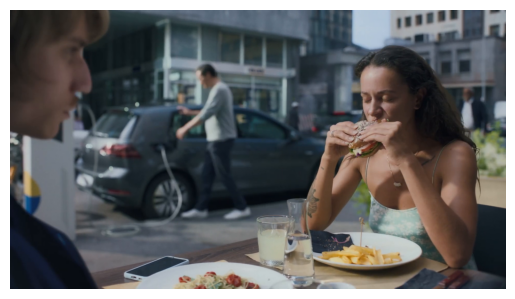

In [6]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


**Import Necessary Libraries**: The code begins by importing essential libraries for image processing and visualization:
- `cv2` for image loading and processing.
- `matplotlib.pyplot` for visualizing the images.
- `seaborn` for enhancing the aesthetics of plots.  

Example: `import cv2` imports OpenCV for image operations, while `sns.set()` applies Seaborn's styles for improved visuals.

**Read the Image Using OpenCV**: The `cv2.imread` function loads an image from the specified file path. The image is stored as a multi-dimensional array in BGR (Blue-Green-Red) color format. Example: `image = cv2.imread(image_path)` reads the image located at the path stored in `image_path`.

**Convert BGR to RGB**: OpenCV loads images in BGR color format, but `matplotlib` displays images in RGB format. The `cv2.cvtColor` function converts the color scheme to RGB for correct visualization. Example: `image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)` performs this conversion.

**Enhance Plot Aesthetics Using Seaborn**: The `sns.set()` function applies Seaborn's style settings to the plot, improving its appearance. This ensures that the visualizations have a modern and clean look.

**Display the Image Using Matplotlib**: The `plt.imshow` function displays the image array in its RGB format, while `plt.axis('off')` hides the axes for a cleaner view. Finally, `plt.show()` renders the image in the notebook or script.

In [7]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"

# Load the image
image = Image.open(image_path).convert("RGB")

# Load the pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class probabilities
probs = torch.nn.functional.softmax(outputs.logits[0], dim=-1)

# Get the top 10 classes by confidence score
top_k = 10
top_probs, top_classes = torch.topk(probs, top_k)

# Load class labels
labels = model.config.id2label

# Print the top 10 classes with confidence scores
print("Top 10 Predicted Classes:")
for i in range(top_k):
    print(f"{i + 1}: {labels[top_classes[i].item()]} ({top_probs[i].item() * 100:.2f}%)")


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Top 10 Predicted Classes:
1: restaurant, eating house, eating place, eatery (54.16%)
2: plate (10.97%)
3: hotdog, hot dog, red hot (8.19%)
4: burrito (2.50%)
5: dining table, board (2.39%)
6: tray (1.09%)
7: panpipe, pandean pipe, syrinx (0.93%)
8: carbonara (0.72%)
9: cheeseburger (0.66%)
10: patio, terrace (0.65%)


**Load Image Using Pillow**: The `Image.open` function from the Pillow library is used to load an image from a specified file path (`image_path`). The `convert("RGB")` method ensures the image is in RGB color format, compatible with the Vision Transformer model. Example: `image = Image.open(image_path).convert("RGB")` loads and prepares the image for processing.

**Load Pre-trained ViT Model and Feature Extractor**: The `ViTFeatureExtractor` and `ViTForImageClassification` classes from the Hugging Face Transformers library are used to load a pre-trained Vision Transformer (ViT) model and its associated feature extractor. These tools are initialized with a specific model name (e.g., `"google/vit-base-patch16-224"`), providing the necessary configurations for image preprocessing and classification. Example: `model = ViTForImageClassification.from_pretrained(model_name)` loads the classification model.

**Preprocess the Image**: The `feature_extractor` preprocesses the loaded image, resizing and normalizing it as required by the pre-trained ViT model. The processed data is returned as PyTorch tensors for further inference. Example: `inputs = feature_extractor(images=image, return_tensors="pt")` prepares the image input for the model.

**Perform Inference**: The pre-trained ViT model is used to predict class logits for the input image. Using `torch.no_grad()`, inference is performed without computing gradients, optimizing memory and speed. Example: `outputs = model(**inputs)` generates the model’s predictions.

**Obtain Predicted Class Probabilities**: The logits produced by the model are converted into probabilities using the softmax function. These probabilities indicate the model's confidence in each class. Example: `probs = torch.nn.functional.softmax(outputs.logits[0], dim=-1)` computes the probabilities for all classes.

**Get Top Predicted Classes**: The `torch.topk` function selects the top 10 predicted classes with the highest confidence scores. Example: `top_probs, top_classes = torch.topk(probs, top_k)` retrieves the most confident predictions.

**Display Predicted Classes and Scores**: The predicted class labels and their corresponding confidence scores are displayed in descending order of confidence. The class labels are retrieved from the model configuration, and each class is printed alongside its score. Example: The top 10 classes are printed with their confidence percentages.

In [8]:
import os
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch
import pandas as pd

# Directories to process
directories = {
    "cv-org1-preem": "/content/cv-org1-preem/",
    "cv-org2-vattenfall": "/content/cv-org2-vattenfall/"
}

# Load the pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Initialize results list
results = []

# Iterate through directories and process images
for org_name, dir_path in directories.items():
    for file_name in os.listdir(dir_path):
        if file_name.startswith("frame_") and file_name.endswith(".png"):
            image_path = os.path.join(dir_path, file_name)

            # Load the image
            image = Image.open(image_path).convert("RGB")

            # Preprocess the image
            inputs = feature_extractor(images=image, return_tensors="pt")

            # Perform inference
            with torch.no_grad():
                outputs = model(**inputs)

            # Get predicted class probabilities
            probs = torch.nn.functional.softmax(outputs.logits[0], dim=-1)

            # Get the top 10 classes by confidence score
            top_k = 10
            top_probs, top_classes = torch.topk(probs, top_k)

            # Store results
            for i in range(top_k):
                results.append({
                    "organization": org_name,
                    "image_path": image_path,
                    "label_rank": i + 1,
                    "class_label": model.config.id2label[top_classes[i].item()],
                    "confidence_score": top_probs[i].item()
                })

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Save the DataFrame as a TSV file
output_tsv_path = "/content/image_classification_results.tsv"
df.to_csv(output_tsv_path, sep="\t", index=False)


In [9]:
df.head()

,organization,image_path,label_rank,class_label,confidence_score
0,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0013.png,1,minibus,0.204525
1,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0013.png,2,"cellular telephone, cellular phone, cellphone,...",0.047764
2,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0013.png,3,"streetcar, tram, tramcar, trolley, trolley car",0.046186
3,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0013.png,4,"passenger car, coach, carriage",0.036240
4,cv-org1-preem,/content/cv-org1-preem/frame_oYgrxXZTAQg_0013.png,5,school bus,0.035839


**Process Multiple Image Directories**: Unlike the previous code, this code iterates over a set of directories, each containing images associated with a specific organization. The directories and their corresponding organization names are specified in a dictionary (`directories`), allowing for batch processing of multiple image sets. Example: The code processes images from `"cv-org1-preem"` and `"cv-org2-vattenfall"` directories.

**Filter and Process Specific Image Files**: The code selects only images with filenames that start with `"frame_"` and end with `".png"`. This ensures that only relevant files are processed within each directory. Example: Files like `"frame_0001.png"` are processed, while others are ignored.

**Iterate and Classify Images**: Each selected image is loaded, preprocessed, and classified using the same Vision Transformer (ViT) model and feature extractor as in the previous code. The classification steps, including inference and obtaining the top predicted classes, are identical to those in the earlier example.

**Store Results in a Structured Format**: Unlike the previous code, which simply prints the top predictions for a single image, this code stores the results for all processed images in a structured list. Each result includes:
- The organization name.
- The image file path.
- The rank of the predicted class (e.g., 1 for the top class, 2 for the second-best class, etc.).
- The class label and confidence score.

Example: Each prediction is saved as a dictionary entry in the `results` list.

**Create and Save a Results DataFrame**: The stored results are converted into a pandas DataFrame for easier analysis and export. The DataFrame is then saved as a tab-separated values (TSV) file for external use. Example: The file `"image_classification_results.tsv"` contains all classification results in a tabular format.

**Key Differences from the Previous Code:**

1. **Batch Processing**: This code handles multiple directories and images, enabling scalable classification of datasets.
2. **Structured Output**: Results are organized into a DataFrame and saved as a TSV file for further analysis or sharing, rather than being printed directly.
3. **Focus on Context**: Each prediction is linked to its originating organization and file path, providing contextual metadata alongside the classification results.

<ipython-input-10-87753fced816>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_labels = aggregated_df.groupby('organization').apply(


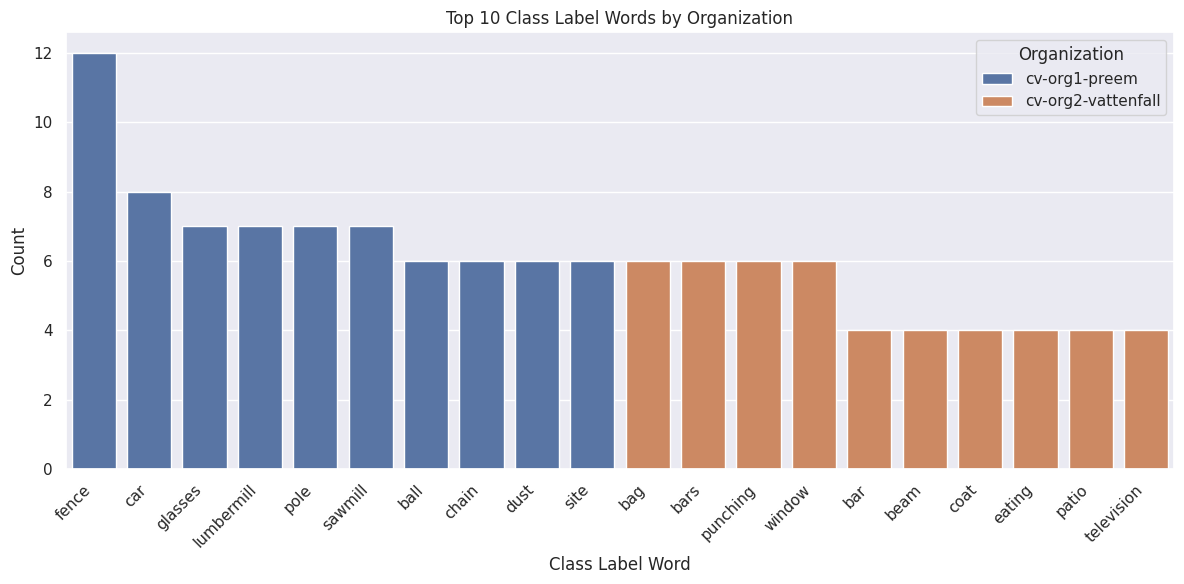

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the previously saved TSV file
input_tsv_path = "/content/image_classification_results.tsv"
df = pd.read_csv(input_tsv_path, sep="\t")

# Split the `class_label` column into individual words
expanded_rows = []
for _, row in df.iterrows():
    words = row['class_label'].replace(',', '').split()
    for word in words:
        expanded_rows.append({'organization': row['organization'], 'class_label_word': word})

# Create a new DataFrame with one label word per row
expanded_df = pd.DataFrame(expanded_rows)

# Aggregate by organization and class_label_word
aggregated_df = expanded_df.groupby(['organization', 'class_label_word']).size().reset_index(name='count')

# Filter for the top 10 labels by organization
top_labels = aggregated_df.groupby('organization').apply(
    lambda x: x.nlargest(10, 'count')
).reset_index(drop=True)

# Visualize the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_labels,
    x='class_label_word',
    y='count',
    hue='organization'
)
plt.title('Top 10 Class Label Words by Organization')
plt.xlabel('Class Label Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Organization')
plt.tight_layout()
plt.show()


**Load Classification Results**: The previously saved TSV file containing image classification results is read into a pandas DataFrame. This enables structured analysis and visualization of the classification data. Example: `df = pd.read_csv(input_tsv_path, sep="\t")` loads the results.

**Expand Class Labels into Words**: The `class_label` column is split into individual words, creating a new DataFrame where each row corresponds to a single word from the original class labels. This step allows for granular analysis of frequently occurring words across class labels. Example: The class label `"renewable energy"` becomes separate rows for `"renewable"` and `"energy"`.

**Aggregate Word Counts by Organization**: The expanded DataFrame is grouped by both `organization` and `class_label_word`. The occurrences of each word within the labels are counted, creating an aggregated summary of word frequencies per organization. Example: `"renewable"` appearing 5 times for "Organization A" is counted as 5.

**Filter for Top Words**: For each organization, the top 10 most frequent words in the class labels are selected. This step highlights the most prominent terms associated with each organization’s image classifications. Example: A lambda function filters the 10 most common words for each organization.

**Visualize Results**: The top 10 words for each organization are visualized using a Seaborn bar plot. Each word’s frequency is displayed along the y-axis, with bars grouped and colored by organization. Example: Words like `"energy"` and `"sustainability"` might appear as top terms with their respective counts.

**Enhance Visualization Aesthetics**: The plot includes customizations such as rotated x-axis labels for readability, a title, labeled axes, and a legend indicating the organizations. This ensures the visualization is both informative and visually appealing.

**Key Focus**: This code transitions from analyzing individual images to summarizing and visualizing trends in classification labels, offering insights into the semantic patterns within each organization's data.

In [11]:
df.shape

(310, 5)

# Object detection, localization

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TrueType font not found. Using default font.
Detected: cup | Confidence: 1.0 | Location: [x_min: 948, y_min: 796, x_max: 1101, y_max: 998]
Detected: person | Confidence: 0.95 | Location: [x_min: -1, y_min: 0, x_max: 385, y_max: 515]
Detected: person | Confidence: 0.99 | Location: [x_min: 1728, y_min: 301, x_max: 1873, y_max: 501]
Detected: person | Confidence: 1.0 | Location: [x_min: 625, y_min: 203, x_max: 932, y_max: 819]
Detected: sandwich | Confidence: 0.98 | Location: [x_min: 1308, y_min: 423, x_max: 1459, y_max: 569]
Detected: car | Confidence: 0.99 | Location: [x_min: 239, y_min: 365, x_max: 1214, y_max: 819]
Detected: cell phone | Confidence: 1.0 | Location: [x_min: 426, y_min: 948, x_max: 696, y_max: 1056]
Detected: tie | Confidence: 0.92 | Location: [x_min: 1756, y_min: 359, x_max: 1793, y_max: 460]
Detected: dining table | Confidence: 0.97 | Location: [x_min: 323, y_min: 820, x_max: 1914, y_max: 1069]
Detected: chair | Confidence: 0.9 | Location: [x_min: 1780, y_min: 747, x_

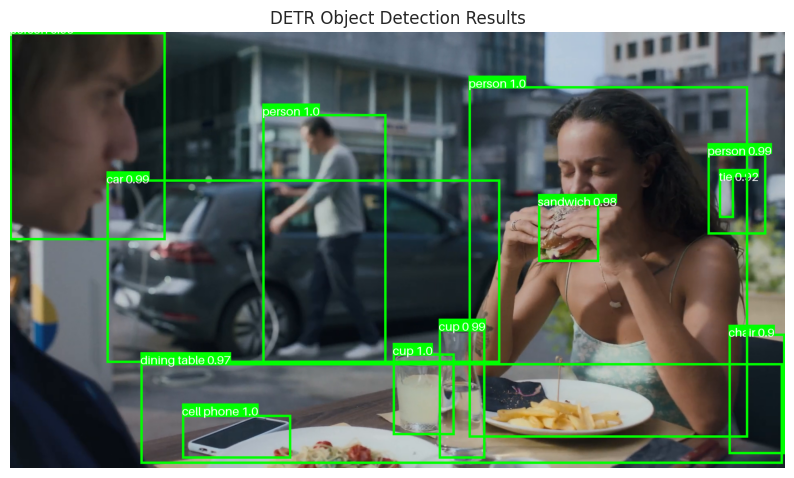

Object detection completed. Result saved to /content/detr_object_detection_result.png


In [12]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
output_image_path = "/content/detr_object_detection_result.png"

# Load the image
image = Image.open(image_path).convert("RGB")

# Load the DETR model and processor
model_name = "facebook/detr-resnet-50"
processor = DetrImageProcessor.from_pretrained(model_name)
model = DetrForObjectDetection.from_pretrained(model_name)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the results
target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Prepare to draw on the image
draw = ImageDraw.Draw(image)

# Load a TrueType font or fallback to default
try:
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Update path if needed
    font = ImageFont.truetype(font_path, size=30)  # Increased font size to 30
except OSError:
    print("TrueType font not found. Using default font.")
    font = ImageFont.load_default(size=30)

# Draw bounding boxes and annotations
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # Extract bounding box coordinates and label
    x_min, y_min, x_max, y_max = [round(i) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]} {round(score.item(), 2)}"

    # Print detected object details
    print(f"Detected: {model.config.id2label[label.item()]} | "
          f"Confidence: {round(score.item(), 2)} | "
          f"Location: [x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}]")

    # Draw the bounding box in green (R:0, G:255, B:0) with increased line width
    draw.rectangle([x_min, y_min, x_max, y_max], outline=(0, 255, 0), width=6)

    # Annotate with class label and confidence score
    text_bbox = draw.textbbox((x_min, y_min), label_text, font=font)  # Get the bounding box of the text
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    draw.rectangle([x_min, y_min - text_height, x_min + text_width, y_min], fill=(0, 255, 0))
    draw.text((x_min, y_min - text_height), label_text, fill="white", font=font)

# Save the result image
image.save(output_image_path)

# Display the result image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("DETR Object Detection Results")
plt.show()

print(f"Object detection completed. Result saved to {output_image_path}")


**Load Image Using Pillow**: The image is loaded using the Pillow library and converted to RGB format to ensure compatibility with the DETR (DEtection TRansformer) model. Example: `image = Image.open(image_path).convert("RGB")` loads the image for object detection.

**Load DETR Model and Processor**: The Hugging Face Transformers library is used to load a pre-trained DETR model (`facebook/detr-resnet-50`) and its associated processor. The processor handles image preprocessing, while the model performs object detection. Example: `processor = DetrImageProcessor.from_pretrained(model_name)` initializes the processor.

**Preprocess the Image**: The processor prepares the image for the DETR model by resizing, normalizing, and converting it into tensors. This ensures the input meets the model’s requirements. Example: `inputs = processor(images=image, return_tensors="pt")` preprocesses the image.

**Perform Object Detection**: Inference is performed using the DETR model, which generates bounding boxes, labels, and confidence scores for detected objects. Example: `outputs = model(**inputs)` computes the detection results.

**Post-process Detection Results**: The processor translates model outputs into human-readable formats, including bounding box coordinates and labels. Only objects with a confidence score above 0.9 are retained. Example: `results = processor.post_process_object_detection(...)` filters and formats the detections.

**Annotate the Image**: Bounding boxes and labels are drawn directly on the image:
- **Bounding Boxes**: Green rectangles outline detected objects with increased line width for clarity.
- **Annotations**: Class labels and confidence scores are overlaid above each bounding box, with text placed on a filled background for better readability.

Example: Each detected object is labeled with its class name (e.g., `"car"`) and confidence (e.g., `"0.95"`).

**Save and Display Results**: The annotated image is saved to a specified path and displayed using Matplotlib. Example: `image.save(output_image_path)` saves the result, and `plt.imshow(image)` shows the annotated image.


preprocessor_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/26.0M [00:00<?, ?B/s]

TrueType font not found. Using default font.
Detected: person | Confidence: 1.0 | Location: [x_min: 1148, y_min: 135, x_max: 1843, y_max: 1029]
Detected: person | Confidence: 0.97 | Location: [x_min: 1741, y_min: 295, x_max: 1831, y_max: 487]
Detected: person | Confidence: 0.99 | Location: [x_min: 1, y_min: -2, x_max: 424, y_max: 1070]
Detected: person | Confidence: 0.99 | Location: [x_min: 619, y_min: 201, x_max: 902, y_max: 807]
Detected: dining table | Confidence: 0.95 | Location: [x_min: 334, y_min: 777, x_max: 1688, y_max: 1072]
Detected: cup | Confidence: 0.98 | Location: [x_min: 954, y_min: 784, x_max: 1098, y_max: 1015]
Detected: car | Confidence: 0.9 | Location: [x_min: 335, y_min: 358, x_max: 1266, y_max: 814]


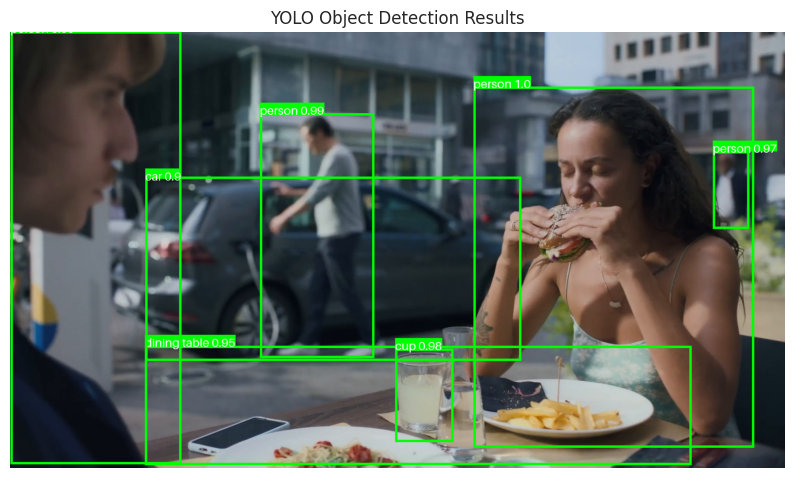

Object detection completed. Result saved to /content/yolo_object_detection_result.png


In [13]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
output_image_path = "/content/yolo_object_detection_result.png"

# Load the image
image = Image.open(image_path).convert("RGB")

# Load the YOLO model and processor
model_name = "hustvl/yolos-tiny"
processor = YolosImageProcessor.from_pretrained(model_name)
model = YolosForObjectDetection.from_pretrained(model_name)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the results
target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
results = processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# Prepare to draw on the image
draw = ImageDraw.Draw(image)

# Load a TrueType font or fallback to default
try:
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Update path if needed
    font = ImageFont.truetype(font_path, size=30)  # Further increased font size to 30
except OSError:
    print("TrueType font not found. Using default font.")
    font = ImageFont.load_default(size=30)

# Draw bounding boxes and annotations
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # Extract bounding box coordinates and label
    x_min, y_min, x_max, y_max = [round(i) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]} {round(score.item(), 2)}"

    # Print detected object details
    print(f"Detected: {model.config.id2label[label.item()]} | "
          f"Confidence: {round(score.item(), 2)} | "
          f"Location: [x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}]")

    # Draw the bounding box in green (R:0, G:255, B:0) with increased line width
    draw.rectangle([x_min, y_min, x_max, y_max], outline=(0, 255, 0), width=6)

    # Annotate with class label and confidence score
    text_bbox = draw.textbbox((x_min, y_min), label_text, font=font)  # Get the bounding box of the text
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    draw.rectangle([x_min, y_min - text_height, x_min + text_width, y_min], fill=(0, 255, 0))
    draw.text((x_min, y_min - text_height), label_text, fill="white", font=font)

# Save the result image
image.save(output_image_path)

# Display the result image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("YOLO Object Detection Results")
plt.show()

print(f"Object detection completed. Result saved to {output_image_path}")


# Face analysis, emotion recognition

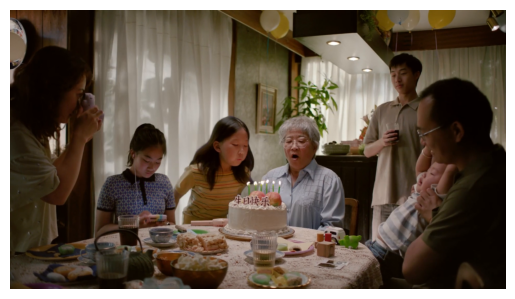

In [14]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013.png"
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


**Import Necessary Libraries**: The code begins by importing essential libraries for image processing and visualization:
- `cv2` for image loading and processing.
- `matplotlib.pyplot` for visualizing the images.
- `seaborn` for enhancing the aesthetics of plots.  

Example: `import cv2` imports OpenCV for image operations, while `sns.set()` applies Seaborn's styles for improved visuals.

**Read the Image Using OpenCV**: The `cv2.imread` function loads an image from the specified file path. The image is stored as a multi-dimensional array in BGR (Blue-Green-Red) color format. Example: `image = cv2.imread(image_path)` reads the image located at the path stored in `image_path`.

**Convert BGR to RGB**: OpenCV loads images in BGR color format, but `matplotlib` displays images in RGB format. The `cv2.cvtColor` function converts the color scheme to RGB for correct visualization. Example: `image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)` performs this conversion.

**Enhance Plot Aesthetics Using Seaborn**: The `sns.set()` function applies Seaborn's style settings to the plot, improving its appearance. This ensures that the visualizations have a modern and clean look.

**Display the Image Using Matplotlib**: The `plt.imshow` function displays the image array in its RGB format, while `plt.axis('off')` hides the axes for a cleaner view. Finally, `plt.show()` renders the image in the notebook or script.

In [15]:
import cv2
import os

# Path to the input image
image_path = "/content/cv-org1-preem/frame_oYgrxXZTAQg_0011.png"
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013.png"

# Load the Haar cascade for face detection
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_cascade_path)

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Resize image to a manageable size (optional, based on input image resolution)
max_width = 800  # Adjust this based on your requirements
height, width = image.shape[:2]
if width > max_width:
    scale_ratio = max_width / width
    image = cv2.resize(image, (int(width * scale_ratio), int(height * scale_ratio)))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocessing: Histogram Equalization and Gaussian Blur to enhance detection
gray_image = cv2.equalizeHist(gray_image)
gray_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Detect faces with optimized parameters
faces = face_cascade.detectMultiScale(
    gray_image,
    scaleFactor=1.05,  # More granularity for better accuracy
    minNeighbors=3,    # Lower threshold to capture more potential faces
    minSize=(30, 30)   # Adjust based on expected face sizes
)

# Draw green rectangles around detected faces and save face subimages
output_directory = os.path.dirname(image_path)
base_filename = os.path.basename(image_path).split('.')[0]
face_count = 0

for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Extract the face subimage
    face_image = image[y:y + h, x:x + w]

    # Save the face subimage as a PNG file
    face_filename = os.path.join(output_directory, f"face{face_count}_{base_filename}.png")
    cv2.imwrite(face_filename, face_image)
    face_count += 1

# Save the image with rectangles drawn
output_image_path = os.path.join(output_directory, f"{base_filename}_with_faces.png")
cv2.imwrite(output_image_path, image)

print(f"Detection completed. Found {face_count} faces.")
print(f"Annotated image saved to: {output_image_path}")
print(f"Face subimages saved with prefix 'face0_' in the same directory.")


Detection completed. Found 1 faces.
Annotated image saved to: /content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013_with_faces.png
Face subimages saved with prefix 'face0_' in the same directory.


**Load Haar Cascade for Face Detection**: The Haar cascade model for detecting frontal faces is loaded using OpenCV. Haar cascades are pre-trained classifiers that identify objects (in this case, faces) based on simple rectangular features. Example: `face_cascade = cv2.CascadeClassifier(haar_cascade_path)` loads the classifier.

**Load and Resize the Image**: The input image is loaded using OpenCV, and optionally resized to a manageable width to ensure faster processing and better compatibility with the Haar cascade. Example: If the image width exceeds 800 pixels, it is scaled down while maintaining its aspect ratio.

**Convert Image to Grayscale**: The loaded image is converted to grayscale, as Haar cascades operate on intensity values rather than color information. Example: `gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)` prepares the grayscale image.

**Preprocess Image for Enhanced Detection**:
- **Histogram Equalization**: This step improves contrast in the grayscale image, making facial features more distinguishable.
- **Gaussian Blur**: A slight blur reduces noise, enhancing detection accuracy. Example: `gray_image = cv2.GaussianBlur(gray_image, (3, 3), 0)` applies the blur.

**Detect Faces**: The `detectMultiScale` function identifies potential faces in the preprocessed image by scanning for regions that match the Haar cascade features. Detection parameters are optimized for accuracy:
- `scaleFactor`: Determines the granularity of scaling during the search.
- `minNeighbors`: Controls the minimum number of overlapping detections required to confirm a face.
- `minSize`: Sets the smallest detectable face size.  
Example: `faces = face_cascade.detectMultiScale(...)` returns bounding boxes for detected faces.

**Annotate and Save Results**:
- **Draw Bounding Boxes**: Green rectangles are drawn around detected faces for visualization.
- **Save Face Subimages**: Each detected face is cropped and saved as an individual image file.
- **Save Annotated Image**: The original image with bounding boxes is saved to the same directory as the input image. Example: `cv2.imwrite(output_image_path, image)` saves the annotated image.

**Print Summary**: The number of detected faces, along with file paths for the annotated image and face subimages, is printed for user reference.

**Haar Cascade as Manifest Content Feature Extraction**

Haar cascades are a method of **manifest content feature extraction** because they focus on directly observable characteristics of the image:
1. **Feature-Based Detection**: Haar cascades rely on simple features like edges, lines, and intensity changes to detect objects, such as the contrast between the eyes and cheeks in a face.
2. **Explicit Bounding Boxes**: The output consists of specific regions (bounding boxes) that explicitly represent detected objects (e.g., faces).
3. **Rule-Based Approach**: Unlike deep learning methods that infer latent content, Haar cascades operate on predefined patterns and thresholds, extracting features that are immediately visible in the pixel data.

This approach is efficient for detecting well-defined objects like faces in controlled environments, making it a classic example of manifest content analysis in computer vision.

# Face detection and extraction

In [18]:
#!pip uninstall -y torch && pip install torch==2.5.1
!pip install -q facenet-pytorch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.2.2 which is incompatible.


**Install FaceNet-PyTorch**: The `facenet-pytorch` package is a PyTorch-based implementation of the FaceNet model, which is widely used for facial recognition and face feature extraction. This package provides pre-trained models and tools for detecting faces, aligning them, and extracting embeddings (numerical representations of faces).

**Key Features:**

1. **Face Detection**: Includes models for detecting faces in images or videos, such as MTCNN (Multi-task Cascaded Convolutional Networks), which efficiently locates facial landmarks.
2. **Face Alignment**: Aligns detected faces based on facial landmarks, improving the quality of embeddings and recognition accuracy.
3. **Face Embeddings**: Generates high-dimensional embeddings that uniquely represent faces, enabling tasks like face verification, clustering, and recognition.

**Applications:**

- Face recognition in photos or video streams.
- Face clustering for grouping similar faces.
- Creating facial embeddings for use in deep learning models.

Example: Installing `facenet-pytorch` enables streamlined workflows for face-related tasks, leveraging the robustness and efficiency of pre-trained FaceNet models.

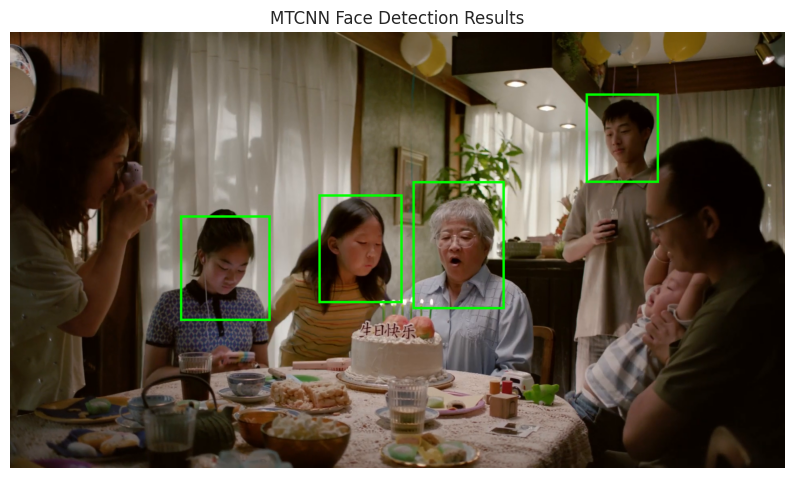

Face detection completed. 4 faces saved.
Annotated image saved to /content/mtcnn_face_detection_result.png


In [20]:
from facenet_pytorch import MTCNN
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
import warnings
import torch

# Suppress the FutureWarning for `torch.load`
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message="You are using `torch.load` with `weights_only=False`.*",
)

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013.png"
output_image_path = "/content/mtcnn_face_detection_result.png"

# Load the image
image = Image.open(image_path).convert("RGB")
image_width, image_height = image.size

# Initialize the MTCNN face detector with suppressed warnings
mtcnn = MTCNN(keep_all=True, post_process=False)

# Detect faces and their bounding boxes
boxes, _ = mtcnn.detect(image)

# Prepare to draw on the image
draw = ImageDraw.Draw(image)

# Directory to save extracted faces
output_dir = os.path.dirname(image_path)
face_count = 0

# Draw bounding boxes and extract face subimages
if boxes is not None:
    for box in boxes:
        x_min, y_min, x_max, y_max = [int(coord) for coord in box]

        # Calculate box width and height
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Expand face box by 50% on each side
        x_min_exp = max(0, x_min - box_width // 2)
        y_min_exp = max(0, y_min - box_height // 2)
        x_max_exp = min(image_width, x_max + box_width // 2)
        y_max_exp = min(image_height, y_max + box_height // 2)

        # Draw the expanded bounding box
        draw.rectangle([x_min_exp, y_min_exp, x_max_exp, y_max_exp], outline=(0, 255, 0), width=6)

        # Extract the face subimage
        face_image = image.crop((x_min_exp, y_min_exp, x_max_exp, y_max_exp))

        # Save the face subimage
        face_filename = os.path.join(output_dir, f"face{face_count:02d}_{os.path.basename(image_path)}")
        face_image.save(face_filename)
        face_count += 1

# Save the result image with bounding boxes
image.save(output_image_path)

# Display the result image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("MTCNN Face Detection Results")
plt.show()

print(f"Face detection completed. {face_count} faces saved.")
print(f"Annotated image saved to {output_image_path}")


**Load the Input Image**: The image is loaded using the Pillow library and converted to RGB format for compatibility with the MTCNN face detector. The dimensions of the image are also retrieved for processing. Example: The input image is prepared for face detection.

**Initialize MTCNN for Face Detection**: The MTCNN (Multi-task Cascaded Convolutional Networks) model is loaded using the `facenet-pytorch` package. The `keep_all=True` parameter ensures that multiple faces in the image are detected. Example: `mtcnn = MTCNN(keep_all=True)` initializes the face detector.

**Detect Faces and Bounding Boxes**: The `detect` method of MTCNN locates faces in the image, returning bounding box coordinates for each detected face. Example: `boxes` contains the positions of all detected faces.

**Expand and Draw Bounding Boxes**: The detected bounding boxes are expanded by 50% on each side to include more facial context. Green rectangles are drawn around the expanded boxes to visualize the detected regions. Example: Expanded boxes ensure the saved face subimages are comprehensive.

**Extract and Save Face Subimages**: Each face detected within the bounding boxes is cropped from the original image and saved as a separate file. Example: `face_image.save(face_filename)` stores the extracted face images in the same directory as the input image.

**Save and Display Annotated Image**: The original image with annotated bounding boxes is saved to a specified file path. It is also displayed using Matplotlib, providing a clear visual representation of the detected faces. Example: `plt.imshow(image)` shows the annotated result.

**Summary**: The code automates face detection, annotation, and subimage extraction. MTCNN's robust detection and the expanded bounding boxes ensure high-quality face detection results.

# Face demographics, emotion

In [21]:
!pip install -q deepface
# restart notebook session


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.0 MB/s eta 0:00:00


**Install DeepFace Package**: The `deepface` library is a Python package for deep learning-based face recognition and analysis. It provides pre-trained models for face verification, facial attribute analysis (age, gender, emotion), and face embeddings. Example: `!pip install -q deepface` installs the library in a Google Colab environment.

---

**Why Restart the Google Colab Notebook Session**: After installing `deepface`, restarting the Colab session is necessary to ensure that the newly installed package is properly loaded into the environment. Without a restart, the notebook might not recognize the package due to how Python manages imports in an active runtime. Example: Restarting ensures the `deepface` package functions correctly.

---

**Code Explanation**:

**Import DeepFace for Face Analysis**: Once the session is restarted, DeepFace provides a user-friendly API to perform face recognition, attribute analysis, and face embedding extraction. The installation and restart prepare the environment for these advanced functionalities. Example: DeepFace simplifies complex face-related tasks using pre-trained models and streamlined workflows.

In [1]:
from facenet_pytorch import MTCNN
from deepface import DeepFace
from PIL import Image
import os

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0013.png"
image = Image.open(image_path).convert("RGB")
image_width, image_height = image.size

# Initialize the MTCNN face detector
mtcnn = MTCNN(keep_all=True)

# Detect faces and their bounding boxes
boxes, _ = mtcnn.detect(image)

# Directory to save temporary cropped face images
output_dir = os.path.dirname(image_path)
face_count = 0

# Process detected faces
if boxes is not None:
    for box in boxes:
        x_min, y_min, x_max, y_max = [int(coord) for coord in box]

        # Calculate box width and height
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Expand face box by 50% on each side
        x_min_exp = max(0, x_min - box_width // 2)
        y_min_exp = max(0, y_min - box_height // 2)
        x_max_exp = min(image_width, x_max + box_width // 2)
        y_max_exp = min(image_height, y_max + box_height // 2)

        # Crop the expanded face region
        face_image = image.crop((x_min_exp, y_min_exp, x_max_exp, y_max_exp))

        # Save the face image temporarily
        temp_face_path = os.path.join(output_dir, f"temp_face_{face_count}.jpg")
        face_image.save(temp_face_path)

        # Analyze the face using DeepFace
        try:
            analysis = DeepFace.analyze(temp_face_path, actions=['age', 'gender', 'race', 'emotion'], enforce_detection=False)

            # Extract the first result if analysis returns a list
            if isinstance(analysis, list):
                analysis = analysis[0]

            # Print results
            print(f"Face {face_count}:")
            print(f"  Age: {analysis.get('age', 'N/A')}")
            print(f"  Gender: {analysis.get('gender', 'N/A')}")
            print(f"  Dominant Race: {analysis.get('dominant_race', 'N/A')}")
            print(f"  Emotion: {analysis.get('dominant_emotion', 'N/A')}")
            print("-" * 50)
        except Exception as e:
            print(f"Error analyzing face {face_count}: {e}")

        face_count += 1

else:
    print("No faces detected.")

print(f"Processed {face_count} faces.")


25-01-11 10:10:44 - Directory /root/.deepface has been created
25-01-11 10:10:44 - Directory /root/.deepface/weights has been created


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

25-01-11 10:10:50 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:06, 85.2MB/s]
  6%|▌         | 30.9M/539M [00:00<00:03, 145MB/s] 
  9%|▊         | 46.1M/539M [00:00<00:04, 120MB/s]
 12%|█▏        | 63.4M/539M [00:00<00:04, 119MB/s]
 15%|█▍        | 80.2M/539M [00:00<00:03, 133MB/s]
 18%|█▊        | 94.9M/539M [00:00<00:03, 123MB/s]
 21%|██        | 111M/539M [00:00<00:03, 133MB/s] 
 23%|██▎       | 126M/539M [00:01<00:03, 128MB/s]
 26%|██▋       | 143M/539M [00:01<00:02, 137MB/s]
 29%|██▉       | 158M/539M [00:01<00:02, 130MB/s]
 33%|███▎      | 176M/539M [00:01<00:02, 143MB/s]
 35%|███▌      | 191M/539M [00:01<00:02, 132MB/s]
 38%|███▊      | 205M/539M [00:01<00:02, 132MB/s]
 41%|████      | 221M/539M [00:01<00:02, 132MB/s]
 44%|████▎     | 235M/539M [00:01<00:02, 135MB/s]
 47%|████▋     | 252M/539M [00:01<00:02

25-01-11 10:11:04 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:06, 86.1MB/s]
  5%|▌         | 29.4M/537M [00:00<00:03, 137MB/s] 
  8%|▊         | 44.0M/537M [00:00<00:04, 118MB/s]
 11%|█▏        | 61.3M/537M [00:00<00:03, 137MB/s]
 14%|█▍        | 76.0M/537M [00:00<00:03, 129MB/s]
 17%|█▋        | 91.8M/537M [00:00<00:03, 137MB/s]
 20%|█▉        | 106M/537M [00:00<00:03, 128MB/s] 
 23%|██▎       | 122M/537M [00:00<00:03, 138MB/s]
 25%|██▌       | 137M/537M [00:01<00:03, 128MB/s]
 29%|██▉       | 158M/537M [00:01<00:02, 132MB/s]
 33%|███▎      | 179M/537M [00:01<00:02, 132MB/s]
 37%|███▋      | 197M/537M [00:01<00:02, 144MB/s]
 40%|███▉      | 212M/537M [00:01<00:02, 129MB/s]
 43%|████▎     | 231M/537M [00:01<00:02, 129MB/s]
 46%|████▌     | 245M/537M [00:01<00:02, 129MB/s]
 48%|████▊     | 258M/537M [00:01

25-01-11 10:11:18 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:06, 80.6MB/s]
  5%|▍         | 25.7M/537M [00:00<00:04, 114MB/s] 
  8%|▊         | 42.5M/537M [00:00<00:04, 120MB/s]
 11%|█▏        | 60.8M/537M [00:00<00:03, 142MB/s]
 14%|█▍        | 75.5M/537M [00:00<00:03, 128MB/s]
 18%|█▊        | 94.9M/537M [00:00<00:03, 129MB/s]
 20%|██        | 109M/537M [00:00<00:03, 130MB/s] 
 24%|██▎       | 126M/537M [00:00<00:03, 135MB/s]
 26%|██▋       | 141M/537M [00:01<00:02, 138MB/s]
 29%|██▉       | 158M/537M [00:01<00:02, 131MB/s]
 33%|███▎      | 177M/537M [00:01<00:02, 147MB/s]
 36%|███▌      | 192M/537M [00:01<00:02, 135MB/s]
 39%|███▊      | 208M/537M [00:01<00:02, 141MB/s]
 41%|████▏     | 223M/537M [00:01<00:02, 128MB/s]
 44%|████▍     | 238M/537M [00:01<00:02, 133MB/s]
 47%|████▋     | 252M/537M 

25-01-11 10:11:28 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 102MB/s]
Action: emotion: 100%|██████████| 4/4 [00:41<00:00, 10.45s/it]


Face 0:
  Age: 55
  Gender: {'Woman': 9.020434319972992, 'Man': 90.97956418991089}
  Dominant Race: asian
  Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]


Face 1:
  Age: 43
  Gender: {'Woman': 29.03997302055359, 'Man': 70.96002697944641}
  Dominant Race: asian
  Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


Face 2:
  Age: 28
  Gender: {'Woman': 15.442650020122528, 'Man': 84.55734848976135}
  Dominant Race: white
  Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

Face 3:
  Age: 29
  Gender: {'Woman': 13.354592025279999, 'Man': 86.64540648460388}
  Dominant Race: asian
  Emotion: sad
--------------------------------------------------
Processed 4 faces.


**Load the Input Image**: The image is loaded using the Pillow library and converted to RGB format for compatibility with the MTCNN face detector and DeepFace. The image dimensions are retrieved to calculate bounding box adjustments.

**Initialize MTCNN for Face Detection**: The MTCNN model is loaded using the `facenet-pytorch` package to detect faces in the image. The `keep_all=True` parameter ensures multiple faces are detected.

**Detect Faces and Bounding Boxes**: MTCNN identifies face regions and returns bounding box coordinates. If no faces are detected, a message is displayed, and processing stops.

**Expand and Crop Face Regions**: Each detected bounding box is expanded by 50% to include additional context around the face. The expanded region is cropped from the image, and the face subimage is saved temporarily.

**Analyze Faces Using DeepFace**: Each cropped face is analyzed with DeepFace to extract attributes like age, gender, race, and emotion. The `enforce_detection=False` parameter ensures the analysis proceeds even if face detection by DeepFace fails.

**Handle Analysis Results**: The analysis results are printed for each face, including the age, gender, dominant race, and dominant emotion. If the analysis returns multiple results (e.g., for videos), only the first result is processed.

**Error Handling**: Exceptions during face analysis are caught and reported to ensure the program continues processing other faces.

**Summary and Output**: The total number of processed faces is printed. This code provides a comprehensive pipeline for detecting, cropping, and analyzing facial attributes from an image. It combines MTCNN's robust face detection with DeepFace's advanced face analysis capabilities.

In [3]:
from facenet_pytorch import MTCNN
from deepface import DeepFace
from PIL import Image
import pandas as pd
import os

# Directories containing images for organizations
directories = {
    "cv-org1-preem": "/content/cv-org1-preem/",
    "cv-org2-vattenfall": "/content/cv-org2-vattenfall/"
}

# Initialize the MTCNN face detector
mtcnn = MTCNN(keep_all=True)

# Initialize a list to store the results
results = []

# Iterate over each organization and its directory
for org_name, dir_path in directories.items():
    for file_name in os.listdir(dir_path):
        if file_name.startswith("frame_") and file_name.endswith(".png"):
            image_path = os.path.join(dir_path, file_name)
            try:
                image = Image.open(image_path).convert("RGB")
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")
                continue

            # Detect faces in the image
            try:
                boxes, _ = mtcnn.detect(image)
            except Exception as e:
                print(f"Error detecting faces in {file_name}: {e}")
                continue

            if boxes is not None:
                face_count = 0
                for box in boxes:
                    x_min, y_min, x_max, y_max = [int(coord) for coord in box]

                    # Calculate box width and height
                    box_width = x_max - x_min
                    box_height = y_max - y_min

                    # Expand face box by 50% on each side
                    x_min_exp = max(0, x_min - box_width // 2)
                    y_min_exp = max(0, y_min - box_height // 2)
                    x_max_exp = min(image.width, x_max + box_width // 2)
                    y_max_exp = min(image.height, y_max + box_height // 2)

                    # Crop the expanded face region
                    face_image = image.crop((x_min_exp, y_min_exp, x_max_exp, y_max_exp))

                    # Save the face image temporarily
                    temp_face_path = os.path.join(dir_path, f"temp_face_{face_count}_{file_name}")
                    try:
                        face_image.save(temp_face_path)
                    except Exception as e:
                        print(f"Error saving face {face_count} in {file_name}: {e}")
                        continue

                    # Analyze the face using DeepFace
                    try:
                        analysis = DeepFace.analyze(
                            img_path=temp_face_path,
                            actions=['age', 'gender', 'race', 'emotion'],
                            enforce_detection=False,
                            silent=True  # Run in quiet mode
                        )

                        # Ensure the analysis result is a dictionary
                        if isinstance(analysis, list):
                            analysis = analysis[0]

                        # Add the analysis results to the list
                        results.append({
                            "organization": org_name,
                            "original_image": image_path,
                            "face_image_path": temp_face_path,
                            "age": analysis.get('age', 'N/A'),
                            "gender": analysis.get('gender', 'N/A'),
                            "dominant_race": analysis.get('dominant_race', 'N/A'),
                            "dominant_emotion": analysis.get('dominant_emotion', 'N/A'),
                        })
                    except Exception as e:
                        print(f"Error analyzing face {face_count} in {file_name}: {e}")
                        continue

                    face_count += 1
            else:
                print(f"No faces detected in {file_name}.")

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Save the results to a CSV file
output_csv_path = "/content/face_analysis_results.csv"
try:
    df.to_csv(output_csv_path, index=False)
    print(f"Face analysis completed. Results saved to {output_csv_path}.")
except Exception as e:
    print(f"Error saving results to CSV: {e}")


No faces detected in frame_oYgrxXZTAQg_0013.png.
No faces detected in frame_oYgrxXZTAQg_0006.png.
No faces detected in frame_oYgrxXZTAQg_0003.png.
No faces detected in frame_oYgrxXZTAQg_0009.png.
No faces detected in frame_oYgrxXZTAQg_0012.png.
No faces detected in frame_oYgrxXZTAQg_0002.png.
No faces detected in frame_oYgrxXZTAQg_0008.png.
No faces detected in frame_YIqk0ylo4rI_0008.png.
No faces detected in frame_YIqk0ylo4rI_0010.png.
No faces detected in frame_YIqk0ylo4rI_0015.png.
Face analysis completed. Results saved to /content/face_analysis_results.csv.


# Results and visualizations

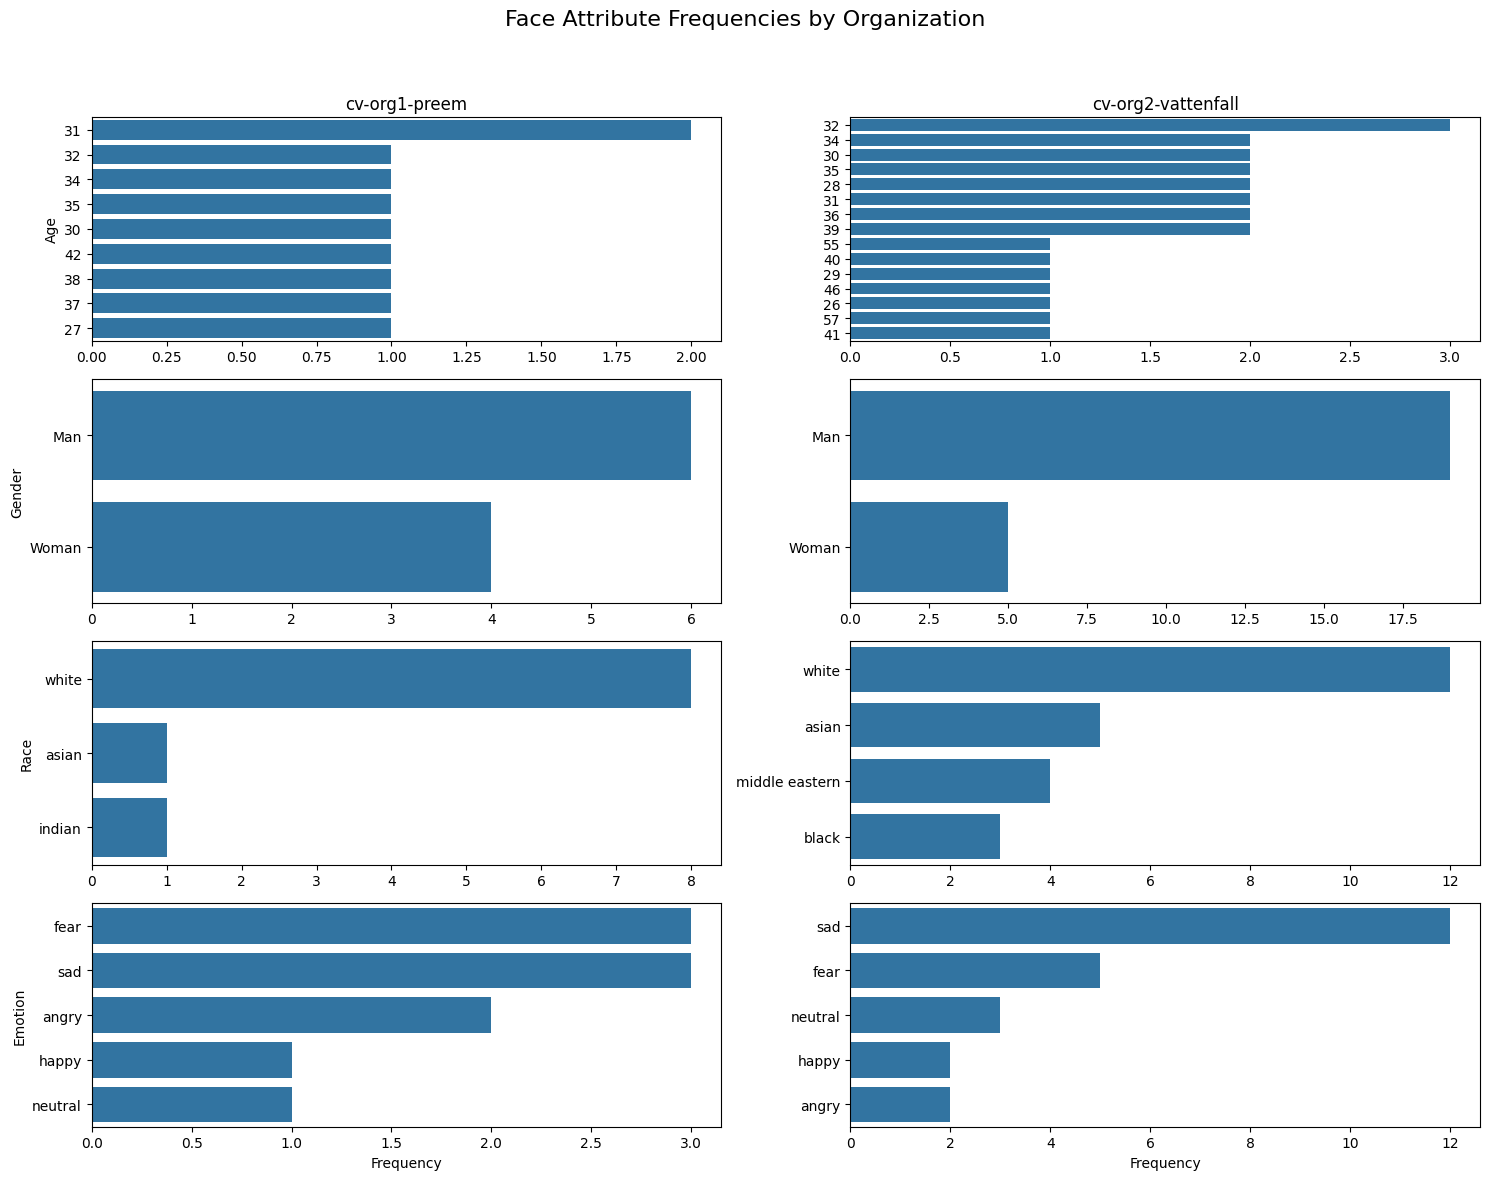

In [4]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results data
csv_path = "/content/face_analysis_results.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Extract the gender with the highest score
def extract_top_gender(gender_str):
    try:
        gender_dict = ast.literal_eval(gender_str)
        return max(gender_dict, key=gender_dict.get)
    except Exception as e:
        return "Unknown"

# Add extracted gender as a new column
df['top_gender'] = df['gender'].apply(extract_top_gender)

# Prepare data for visualization
categories = ['age', 'top_gender', 'dominant_race', 'dominant_emotion']
category_titles = ['Age', 'Gender', 'Race', 'Emotion']
organizations = df['organization'].unique()

# Create subplots
fig, axes = plt.subplots(len(categories), len(organizations), figsize=(15, 12), sharey=False)
fig.suptitle("Face Attribute Frequencies by Organization", fontsize=16)

# Iterate over categories and organizations to plot
for row, category in enumerate(categories):
    for col, org in enumerate(organizations):
        # Filter data for the specific organization
        org_data = df[df['organization'] == org]

        # Plot frequency counts for the category
        sns.countplot(
            data=org_data,
            y=category,
            ax=axes[row, col],
            order=org_data[category].value_counts().index
        )

        # Set subplot titles and labels
        if row == 0:  # Set column titles
            axes[row, col].set_title(org, fontsize=12)
        if col == 0:  # Set row titles
            axes[row, col].set_ylabel(category_titles[row], fontsize=10)
        else:
            axes[row, col].set_ylabel("")

        # Hide x-axis labels for rows other than the last
        if row < len(categories) - 1:
            axes[row, col].set_xlabel("")
        else:
            axes[row, col].set_xlabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the overall title
plt.show()


**Load the Results Data**: The CSV file containing face analysis results is loaded into a pandas DataFrame. This allows for structured data manipulation and visualization.

**Extract Gender with Highest Score**: A function, `extract_top_gender`, parses the `gender` column, which contains a dictionary of confidence scores for "Woman" and "Man." The function identifies the gender with the highest score and returns it as a new value.

**Add Gender Column**: The extracted gender is added as a new column, `top_gender`, to the DataFrame. This simplifies visualization by providing a single categorical value for gender.

**Define Categories and Organizations**: Four face categories (`age`, `top_gender`, `dominant_race`, and `dominant_emotion`) are selected for visualization. The unique organizations in the dataset are identified for subplot columns.

**Create Subplots for Visualization**: A grid of subplots is created using Matplotlib, with rows representing categories and columns representing organizations. Each subplot visualizes the frequency of values for a specific category within an organization.

**Plot Frequency Counts**: Seaborn’s `countplot` is used to display the frequency distribution of each category for each organization. The plots are arranged dynamically based on the data distribution.

**Set Titles and Labels**: Each column is labeled with the corresponding organization name, and each row is labeled with the category name (e.g., "Gender"). X-axis labels are hidden for all rows except the last for cleaner presentation.

**Adjust Layout and Display**: The `tight_layout` function optimizes spacing between subplots to prevent overlaps, and the entire plot grid is displayed with a descriptive title summarizing the visualization.